In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
df_raw = pd.read_csv('kastom_filled.csv', parse_dates=[0], index_col=0)
wind = pd.read_csv('wind.csv', parse_dates=[0], index_col=0)

In [9]:
df = pd.concat([df_raw, wind],axis=1, join='inner')
df.columns= ['Temp (C)', 'Humidity (%)', 'PM10 (ug/m3)', 'PM2.5 (ug/m3)', 'PM1 (ug/m3)', 'CO (μg/m3 10²)', 'NO2 (ppb)','windspeed', 'direction']

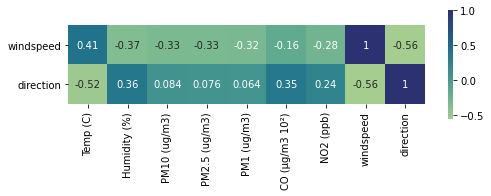

In [10]:
plt.figure(figsize=(8,2))
sns.heatmap(df.corr()[['windspeed','direction']].T,cmap='crest', annot=True, square=True)
plt.show()

#### Δεν υφίσταται συσχέτιση κατεύθυνσης σε μοίρες.

In [11]:
bins = bins = np.linspace(0,360,9)+22.5
bins = np.insert(bins,0,0)
labels = ["N","NE","E","SE","S","SW","W","NW","N2"]

In [12]:
df['wind direction'] = pd.cut(df.direction, bins=bins, labels=labels, include_lowest=True)
df['wind direction'] = df['wind direction'].replace('N2','N')
df.head()

,Temp (C),Humidity (%),PM10 (ug/m3),PM2.5 (ug/m3),PM1 (ug/m3),CO (μg/m3 10²),NO2 (ppb),windspeed,direction,wind direction
2022-05-13 12:00:00,26.29,37.05,45.0,29.0,12.0,44.52,35.89,1.46,68.00,E
2022-05-13 13:00:00,26.74,34.42,42.5,26.0,11.0,41.10,39.31,2.98,72.62,E
2022-05-13 14:00:00,27.12,34.27,37.0,23.0,9.0,47.95,34.54,5.81,71.18,E
2022-05-13 15:00:00,26.91,34.05,37.5,22.5,10.0,51.37,35.94,6.98,57.97,NE
2022-05-13 16:00:00,26.69,33.46,36.0,22.0,9.0,54.79,40.99,6.23,56.73,NE


In [13]:
df['wind direction']=df['wind direction'].astype('string')
df.loc[df['windspeed']<0.5,'wind direction'] = 'CALM'

In [14]:
df.to_csv('kastom_wind.csv')